In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

In [3]:
os.path.exists

<function genericpath.exists(path)>

In [46]:
full_df = pd.DataFrame()
cols = ['Trial', "tr_mse", 'te_mse']

basic = 0.1
equiv = 1e-5
fname = "./saved-outputs/log_basic" + str(basic) + "_equiv" + str(equiv) + ".pkl"
rpp_df = pd.read_pickle(fname)
rpp_df.columns = cols
rpp_df['type'] = 'RPP'
full_df = pd.concat((full_df, rpp_df))

fname = "./saved-outputs/mlplog_basic0.0001_equiv0.0001.pkl"
mlp_df = pd.read_pickle(fname)
mlp_df.columns = cols
mlp_df['type'] = "MLP"
full_df = pd.concat((full_df, mlp_df))


fname = "./saved-outputs/emlplog_basic0.0001_equiv0.0001.pkl"
emlp_df = pd.read_pickle(fname)
emlp_df.columns = cols
emlp_df['type'] = "EMLP"
full_df = pd.concat((full_df, emlp_df))

In [47]:
full_df['log_te_mse'] = np.log(full_df['te_mse'])

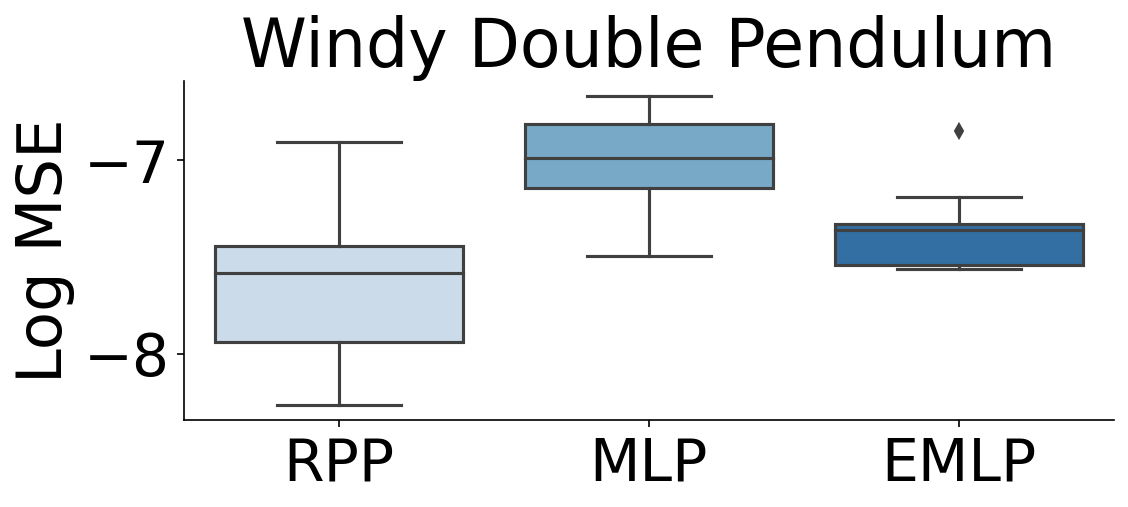

In [48]:
cpal = sns.color_palette("cmo.matter", n_colors=3)

fs = 30

fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 3))
sns.boxplot(x='type', y='log_te_mse', data=full_df, palette="Blues", ax=ax)
ax.set_xlabel("", fontsize=fs)
ax.set_ylabel("Log MSE", fontsize=fs)
ax.tick_params("both", labelsize=fs-2)
ax.set_title("Windy Double Pendulum", fontsize=fs+2)
sns.despine()
plt.savefig("./partial_sym_pendulum.pdf", bbox_inches='tight')
plt.show()

## Pendulum Data

In [28]:
full_df = pd.DataFrame()
cols = ['Trial', "tr_mse", 'te_mse']

basic = 0.1
equiv = 1e-05
fname = "./saved-outputs/inertia_log_MixedEMLP_basic" + str(basic) + "_equiv" + str(equiv) + ".pkl"
rpp_df = pd.read_pickle(fname)
rpp_df.columns = cols
rpp_df['type'] = 'RPP'
full_df = pd.concat((full_df, rpp_df))

fname = "./saved-outputs/inertia_log_mlp_basic100.0_equiv0.001.pkl"
mlp_df = pd.read_pickle(fname)
mlp_df.columns = cols
mlp_df['type'] = "MLP"
full_df = pd.concat((full_df, mlp_df))


fname = "./saved-outputs/inertia_log_emlp_basic100.0_equiv0.001.pkl"
emlp_df = pd.read_pickle(fname)
emlp_df.columns = cols
emlp_df['type'] = "EMLP"
full_df = pd.concat((full_df, emlp_df))

In [29]:
full_df['log_te_mse'] = np.log(full_df['te_mse'])

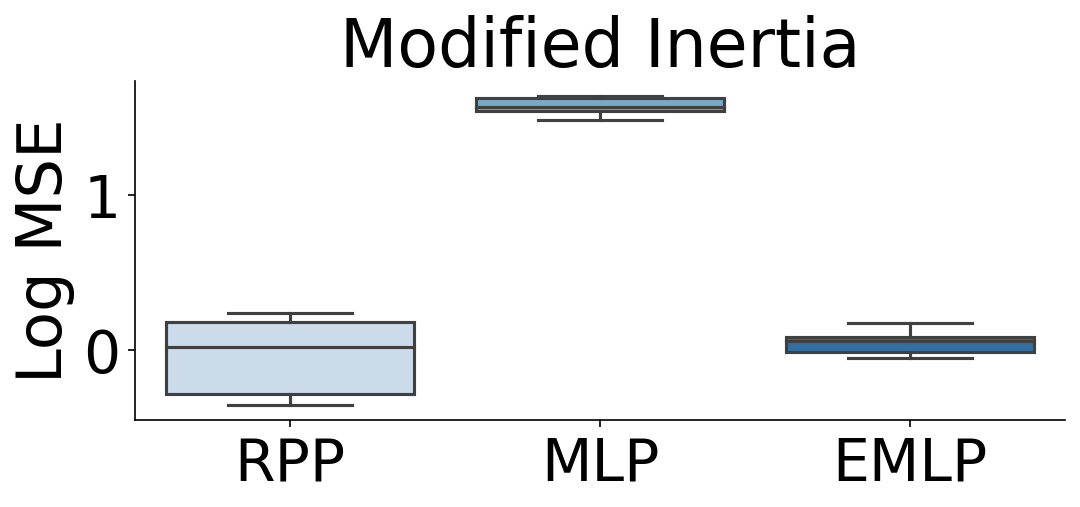

In [31]:
cpal = sns.color_palette("cmo.matter", n_colors=3)

fs = 30

fig, ax = plt.subplots(1,1, dpi=150, figsize=(8, 3))
sns.boxplot(x='type', y='log_te_mse', data=full_df, palette="Blues", ax=ax,
           showfliers=False)
ax.set_xlabel("", fontsize=fs)
ax.set_ylabel("Log MSE", fontsize=fs)
ax.tick_params("both", labelsize=fs-2)
ax.set_title("Modified Inertia", fontsize=fs+2)
sns.despine()
plt.savefig("./partial_sym_inertia.pdf", bbox_inches='tight')
plt.show()